<a href="https://colab.research.google.com/github/givasSI/Desafio-Analise-de-dados/blob/main/AluraStoreBrasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [42]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

df_lojas = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

df_lojas.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Loja
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja 1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja 1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja 1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja 1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja 1


In [43]:
df_lojas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Produto                 9435 non-null   object 
 1   Categoria do Produto    9435 non-null   object 
 2   Preço                   9435 non-null   float64
 3   Frete                   9435 non-null   float64
 4   Data da Compra          9435 non-null   object 
 5   Vendedor                9435 non-null   object 
 6   Local da compra         9435 non-null   object 
 7   Avaliação da compra     9435 non-null   int64  
 8   Tipo de pagamento       9435 non-null   object 
 9   Quantidade de parcelas  9435 non-null   int64  
 10  lat                     9435 non-null   float64
 11  lon                     9435 non-null   float64
 12  Loja                    9435 non-null   object 
dtypes: float64(4), int64(2), object(7)
memory usage: 958.4+ KB


In [44]:
df_lojas.isnull().sum()

,0
Produto,0
Categoria do Produto,0
Preço,0
Frete,0
Data da Compra,0
Vendedor,0
Local da compra,0
Avaliação da compra,0
Tipo de pagamento,0
Quantidade de parcelas,0


#1. Análise do faturamento



In [45]:
def calcular_faturamento_lojas_unificado(df_combinado):
    faturamento_por_loja = df_combinado.groupby('Loja')['Preço'].sum().reset_index()
    return faturamento_por_loja

In [46]:
faturamento_por_loja_df = calcular_faturamento_lojas_unificado(df_lojas)
print('Faturamento por Loja (usando DataFrame unificado):')
print(faturamento_por_loja_df)

Faturamento por Loja (usando DataFrame unificado):
     Loja       Preço
0  Loja 1  1534509.12
1  Loja 2  1488459.06
2  Loja 3  1464025.03
3  Loja 4  1384497.58


# 2. Vendas por Categoria

In [47]:
categoria_loja = df_lojas.groupby('Loja')['Categoria do Produto'].value_counts().reset_index(name='Contagem')

In [48]:
for loja_nome in categoria_loja['Loja'].unique():
    print(f'\nCategoria {loja_nome}:')
    print(categoria_loja[categoria_loja['Loja'] == loja_nome])


Categoria Loja 1:
     Loja   Categoria do Produto  Contagem
0  Loja 1                 moveis       465
1  Loja 1            eletronicos       448
2  Loja 1             brinquedos       324
3  Loja 1       eletrodomesticos       312
4  Loja 1        esporte e lazer       284
5  Loja 1  instrumentos musicais       182
6  Loja 1                 livros       173
7  Loja 1  utilidades domesticas       171

Categoria Loja 2:
      Loja   Categoria do Produto  Contagem
8   Loja 2                 moveis       442
9   Loja 2            eletronicos       422
10  Loja 2             brinquedos       313
11  Loja 2       eletrodomesticos       305
12  Loja 2        esporte e lazer       275
13  Loja 2  instrumentos musicais       224
14  Loja 2                 livros       197
15  Loja 2  utilidades domesticas       181

Categoria Loja 3:
      Loja   Categoria do Produto  Contagem
16  Loja 3                 moveis       499
17  Loja 3            eletronicos       451
18  Loja 3             brinq

as categorias mais populares nas 4 lojas sao repectivamente 1 moveis, 2 eletronicos, 3 brinquedos.

sendo todas em comuns nas 4

# 3. Média de Avaliação das Lojas


In [49]:
media_avaliacao_por_loja = df_lojas.groupby('Loja')['Avaliação da compra'].mean().reset_index()
print('Média de avaliação por loja:')
print(media_avaliacao_por_loja)

Média de avaliação por loja:
     Loja  Avaliação da compra
0  Loja 1             3.976685
1  Loja 2             4.037304
2  Loja 3             4.048326
3  Loja 4             3.995759


In [50]:
medias_avaliacoes = media_avaliacao_por_loja['Avaliação da compra'].tolist()

for i, media in enumerate(medias_avaliacoes):
  print(f'Média de avaliação loja {i+1}: {media:.2f}')

Média de avaliação loja 1: 3.98
Média de avaliação loja 2: 4.04
Média de avaliação loja 3: 4.05
Média de avaliação loja 4: 4.00


# 4. Produtos Mais e Menos Vendidos

In [51]:
for loja_nome in df_lojas['Loja'].unique():
    df_loja = df_lojas[df_lojas['Loja'] == loja_nome]

    # Produto mais vendido na Loja
    produto_mais_vendido = df_loja['Produto'].value_counts().idxmax()
    quantidade_mais_vendido = df_loja['Produto'].value_counts().max()

    # Produto menos vendido na Loja
    produto_menos_vendido = df_loja['Produto'].value_counts().idxmin()
    quantidade_menos_vendido = df_loja['Produto'].value_counts().min()

    print(f"Na {loja_nome}, o produto mais vendido foi: '{produto_mais_vendido}' com {quantidade_mais_vendido} unidades.")
    print(f"Na {loja_nome}, o produto menos vendido foi: '{produto_menos_vendido}' com {quantidade_menos_vendido} unidades.\n")

Na Loja 1, o produto mais vendido foi: 'Micro-ondas' com 60 unidades.
Na Loja 1, o produto menos vendido foi: 'Headset' com 33 unidades.

Na Loja 2, o produto mais vendido foi: 'Iniciando em programação' com 65 unidades.
Na Loja 2, o produto menos vendido foi: 'Jogo de tabuleiro' com 32 unidades.

Na Loja 3, o produto mais vendido foi: 'Kit banquetas' com 57 unidades.
Na Loja 3, o produto menos vendido foi: 'Blocos de montar' com 35 unidades.

Na Loja 4, o produto mais vendido foi: 'Cama box' com 62 unidades.
Na Loja 4, o produto menos vendido foi: 'Guitarra' com 33 unidades.



In [52]:
contagem_total = df_lojas['Produto'].value_counts()

produto_mais_vendido_geral = contagem_total.idxmax()
quantidade_mais_vendido_geral = contagem_total.max()
produto_menos_vendido_geral = contagem_total.idxmin()
quantidade_menos_vendido_geral = contagem_total.min()

print(f"O produto mais vendido foi: '{produto_mais_vendido_geral}' com {quantidade_mais_vendido_geral} unidades.")
print(f"O produto menos vendido foi: '{produto_menos_vendido_geral}' com {quantidade_menos_vendido_geral} unidades.")

O produto mais vendido foi: 'Cômoda' com 210 unidades.
O produto menos vendido foi: 'Celular ABXY' com 157 unidades.


no geral o produto mais vendido nas 4 foi Cômoda e o menos foi o Celular ABXY.
O Curioso é que o produto mais vendido é da categoria mais popular e o menos vendido é da segunda categoria mais popular.



# 5. Frete Médio por Loja

In [53]:
media_de_frete_por_loja = df_lojas.groupby('Loja')['Frete'].mean().reset_index()
print('Média de Frete por Loja:')
print(media_de_frete_por_loja)

Média de Frete por Loja:
     Loja      Frete
0  Loja 1  34.691805
1  Loja 2  33.621941
2  Loja 3  33.074464
3  Loja 4  31.278997


#6. Graficos

##Importação das bibliotecas

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

##Grafico de faturamento

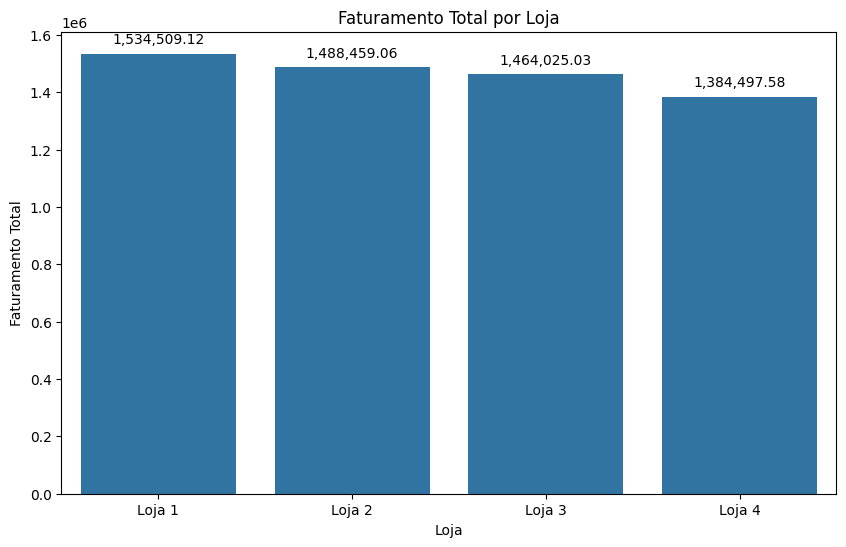

In [55]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Loja', y='Preço', data=faturamento_por_loja_df)
plt.title('Faturamento Total por Loja')
plt.xlabel('Loja')
plt.ylabel('Faturamento Total')

for p in ax.patches:
    ax.annotate(f'{p.get_height():,.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

A loja 1 detem o maior faturamento entre as 4 lojas, enquanto a loja 4 tem o menor faturmento e menor lucro.

##Média de Avaliação por Loja

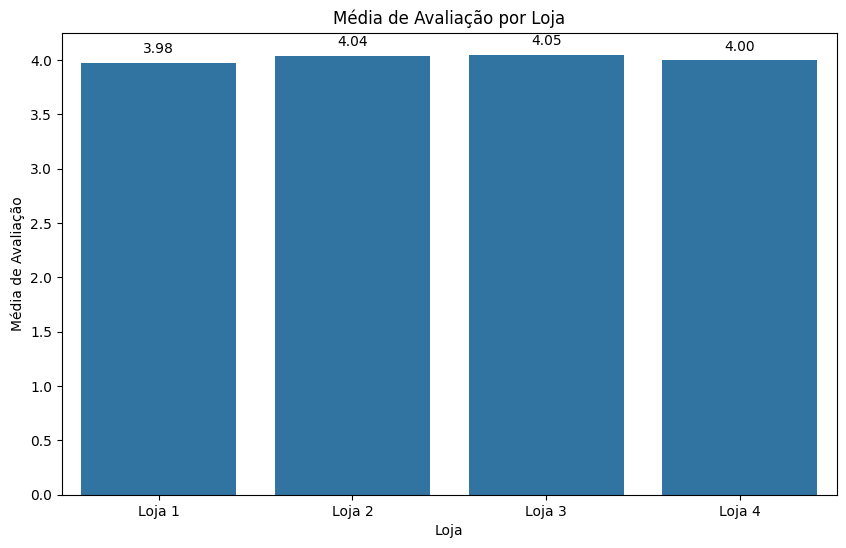

In [56]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Loja', y='Avaliação da compra', data=media_avaliacao_por_loja)
plt.title('Média de Avaliação por Loja')
plt.xlabel('Loja')
plt.ylabel('Média de Avaliação')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

a loja 3 detem as melhores avaliaçoes enquanto a loja 1 mesmo com o melhor faturamento tem a menor media em avaliaçoes.

##Grafico de Frete Médio por Loja

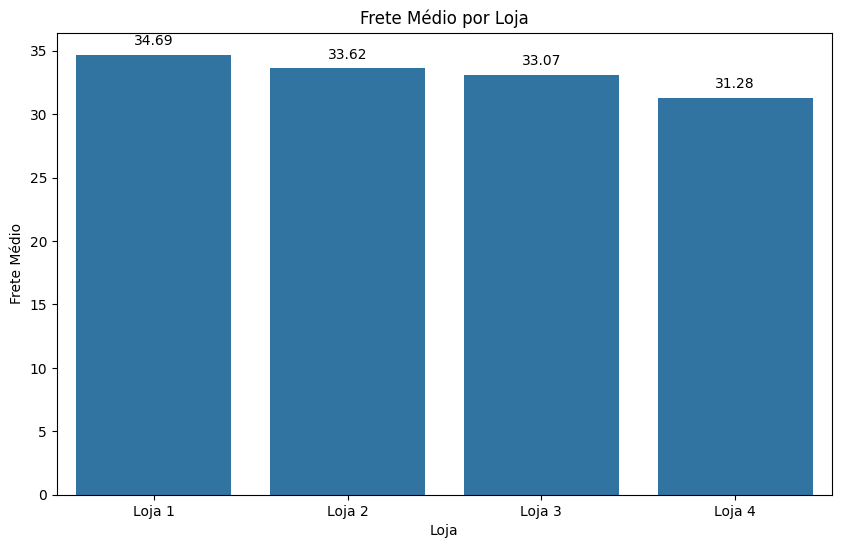

In [57]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Loja', y='Frete', data=media_de_frete_por_loja)
plt.title('Frete Médio por Loja')
plt.xlabel('Loja')
plt.ylabel('Frete Médio')

for p in ax.patches:
    ax.annotate(f'{p.get_height():,.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

loja 1 contem o maior frete que pode não ser tão atrativo para o cliente e pode ser algo que influencie nas avaliaçoes. Enquanto a loja 4 contem o menor frete, pode ser uma opção mais atrativa para o cliente, Tendo em vista que o frete é por parte do cliente.

##Distribuição de Vendas por Categorias

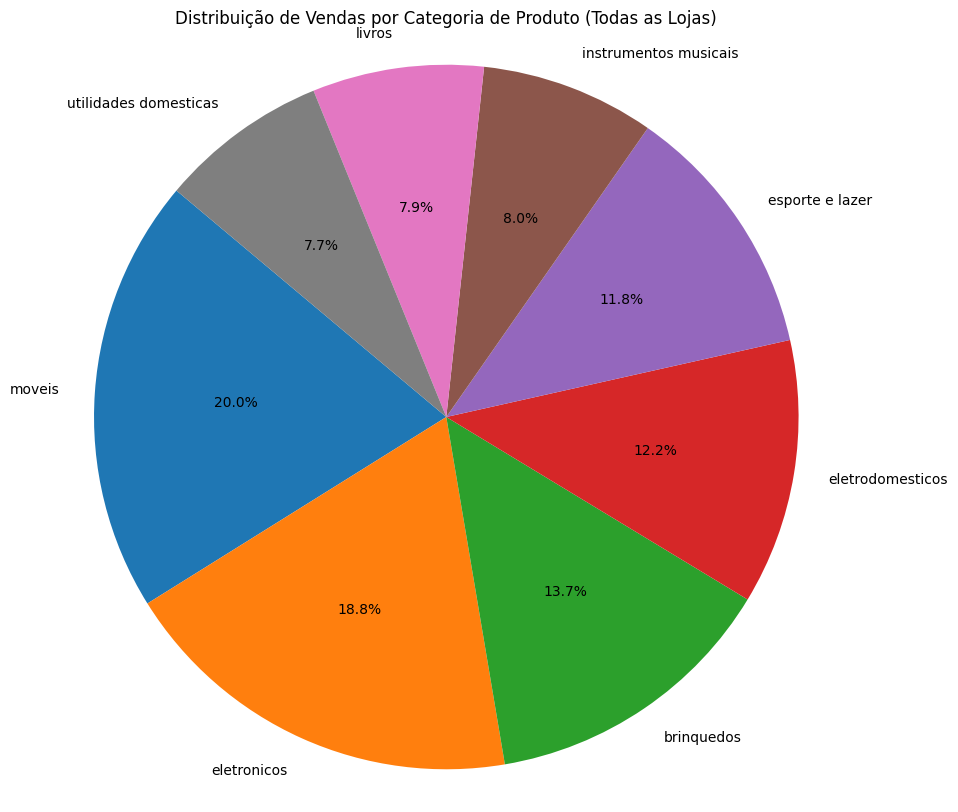

In [58]:
vendas_por_categoria = df_lojas['Categoria do Produto'].value_counts()

plt.figure(figsize=(10, 10))
plt.pie(vendas_por_categoria, labels=vendas_por_categoria.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição de Vendas por Categoria de Produto (Todas as Lojas)')
plt.axis('equal') # Garante que o gráfico de pizza seja desenhado como um círculo.
plt.show()

As categorias mais populares nas 4 lojas sao repectivamente 1 moveis, 2 eletronicos, 3 brinquedos. que juntas são quase 65% das vendas totasi das 4 lojas, porem quais são as categorias mais lucrativas? qual a porcentagem das categorias populares no lucro das 4 lojas?

In [63]:
faturamento_por_categoria = df_lojas.groupby('Categoria do Produto')['Preço'].sum().reset_index()
print('Faturamento por Categoria de Produto:')
print(faturamento_por_categoria.sort_values(by='Preço', ascending=False))

Faturamento por Categoria de Produto:
    Categoria do Produto       Preço
2            eletronicos  2214099.72
1       eletrodomesticos  1766337.03
6                 moveis  1010214.00
4  instrumentos musicais   465029.67
3        esporte e lazer   190635.39
0             brinquedos    98140.86
7  utilidades domesticas    76773.38
5                 livros    50260.74


In [69]:
import plotly.express as px

categorias_agrupar = ['livros', 'utilidades domesticas', 'brinquedos']

# Calcular o faturamento das categorias a serem agrupadas
outros_faturamento = faturamento_por_categoria[faturamento_por_categoria['Categoria do Produto'].isin(categorias_agrupar)]['Preço'].sum()

# Criar um novo DataFrame com as categorias não agrupadas
df_plot = faturamento_por_categoria[~faturamento_por_categoria['Categoria do Produto'].isin(categorias_agrupar)].copy()

# Adicionar a categoria 'Outros' ao novo DataFrame
df_plot = pd.concat([df_plot, pd.DataFrame([{'Categoria do Produto': 'Outros', 'Preço': outros_faturamento}])], ignore_index=True)

fig = px.pie(
    df_plot,
    names='Categoria do Produto',
    values='Preço',
    title='Distribuição do Faturamento por Categoria de Produto (Categorias Agrupadas)',
    hole=0.3  # transforma em donut (opcional)
)

# Deixar o layout mais bonito
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(
    showlegend=True,
    title_font_size=20
)

fig.show()

nem todas as categorias populares são as mais lucrativas por exemplo, brinquedos esta em "outros" pois tem uma porcentagem muito baixa.



#Relatorio Final